In [1]:
import matplotlib.pyplot as plt
import numpy as np
from pomegranate import *


def plot_data(data, ax, bins=np.linspace(0., 1., 100), name=None):
    ax.hist(data, bins, alpha=0.5, density=True, label=name)

def plot_density(bins, pdf, ax, name=None):
    assert len(bins) == len(pdf)
    ax.plot(bins, pdf, label=name)

## sample() and probability()

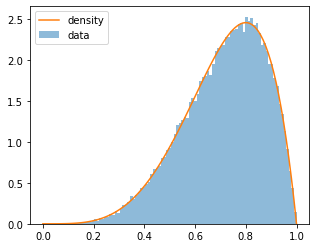

In [2]:
d = TrueBetaDistribution(5, 2, x_eps=0)

samples = d.sample(60000)

bins = np.linspace(0., 1., 100)
pdf = d.probability(bins)


fig, ax = plt.subplots(1, 1, figsize=(5, 4))
plot_data(samples, ax, bins=bins, name='data')
plot_density(bins, pdf, ax, name='density')
plt.legend()
plt.show()

## from_samples()

{
    "class" : "Distribution",
    "name" : "TrueBetaDistribution",
    "parameters" : [
        5.01167521682874,
        3.0131040311532478
    ],
    "frozen" : false
}


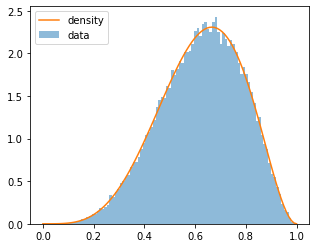

In [3]:
samples = np.random.beta(5, 3, size=50000)
d = TrueBetaDistribution.from_samples(samples)

bins = np.linspace(0., 1., 100)
pdf = d.probability(bins)

print(d)

fig, ax = plt.subplots(1, 1, figsize=(5, 4))
plot_data(samples, ax, bins=bins, name='data')
plot_density(bins, pdf, ax, name='density')
plt.legend()
plt.show()



## Beta Mixture Model

{
    "class" : "GeneralMixtureModel",
    "distributions" : [
        {
            "class" : "Distribution",
            "name" : "TrueBetaDistribution",
            "parameters" : [
                2.022187418401489,
                5.106707973990119
            ],
            "frozen" : false
        },
        {
            "class" : "Distribution",
            "name" : "TrueBetaDistribution",
            "parameters" : [
                4.663856018895988,
                0.7851713152445329
            ],
            "frozen" : false
        }
    ],
    "weights" : [
        0.6607858199723468,
        0.3392141800276532
    ]
}


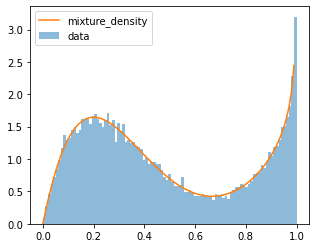

In [4]:

c1 = np.random.beta(2, 5, size=20000)
c2 = np.random.beta(5, 0.8, size=10000)
mixture = np.concatenate((c1, c2), axis=0)

model = GeneralMixtureModel.from_samples(TrueBetaDistribution , n_components=2, X=mixture.reshape(-1, 1))

print(model)

bins = np.linspace(0., 1., 100)
pdf = model.probability(bins)

fig, ax = plt.subplots(1, 1, figsize=(5, 4))
plot_data(mixture, ax, bins=bins, name='data')
plot_density(bins, pdf, ax, name='mixture_density')
plt.legend()
plt.show()
